# Validación de Modelos (Básica)

1. Introducción a la Validación de Modelos
1. Metodología de *Train/Test Split*
1. Cross-Validation

***
### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, make_regression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

***
### Funciones auxiliares

In [2]:
rng = np.random.default_rng()

In [3]:
def simulate_regression_data(m, b, rng, size = 1000):
    
    df = pd.DataFrame(data = {'X': rng.uniform(size = size),
                              'm_noise': rng.uniform(low = -0.25, high = 0.25, size = size),
                              'b_noise': rng.normal(0,0.20,size),
                              'external_noise': rng.choice([1, 0.85, 0.75, 1.10], p = [0.85, 0.05, 0.05, 0.05], size = size)})

    df.loc[:, 'y'] = (df.loc[:, 'X'] * m * (1 + df.loc[:, 'm_noise']) + b * (1 + df.loc[:, 'b_noise'])) * df.loc[:, 'external_noise']
    
    X = df.loc[:, 'X'].copy()
    y = df.loc[:, 'y'].copy()
    
    return X, y

***

## Introducción a la Validación de Modelos

En el vasto ámbito del Aprendizaje Automático (*Machine Learning*) y la Ciencia de Datos, la validación de modelos emerge como un pilar fundamental. En esta lección inicial, nos sumergimos en el concepto de la **validación de modelos** y destacamos su indiscutible relevancia en la creación de modelos predictivos confiables y eficaces.

La validación de modelos representa un proceso crítico que garantiza que los modelos de aprendizaje automático sean aptos para su propósito, lo que, a su vez, asegura que las decisiones basadas en estos modelos sean sólidas y fundamentadas. En esencia, se trata de una práctica esencial para evaluar la capacidad de un modelo para generalizar patrones y realizar predicciones precisas en datos no vistos previamente.

Supongamos, por ejemplo, que estamos desarrollando un modelo de diagnóstico médico basado en imágenes. Si no validamos adecuadamente nuestro modelo, podríamos estar en riesgo de proporcionar diagnósticos incorrectos a pacientes, lo que podría tener consecuencias graves. La validación de modelos se convierte en una salvaguardia crucial para garantizar que nuestro modelo sea confiable y seguro.

En esta lección introductoria, ofrecemos una visión general de los conceptos clave que exploraremos a lo largo del curso. Entre ellos, se incluyen técnicas como la división de datos en conjuntos de entrenamiento y prueba, la validación cruzada K-fold y la partición de datos en conjuntos de entrenamiento, validación y prueba.

Cada uno de estos enfoques tiene su propio propósito y aplicación en la validación de modelos, y nuestro objetivo es equiparlo con el conocimiento y las herramientas necesarias para abordar diversos desafíos en el desarrollo de modelos de aprendizaje automático.

* **Definición:**

La validación de modelos es un proceso crítico en el campo del aprendizaje automático que se encarga de evaluar la calidad y la eficacia de los modelos predictivos. Su objetivo principal es asegurarse de que un modelo tenga la capacidad de generalizar patrones a partir de los datos de entrenamiento y aplicar estos patrones de manera precisa a datos nuevos y no vistos anteriormente. Esto garantiza que las decisiones basadas en los resultados del modelo sean informadas y confiables.

* **La Importancia de la Validación de Modelos:**

    * **Toma de Decisiones Informadas:** Permite tomar decisiones respaldadas por datos y no por suposiciones, lo que es crítico en aplicaciones como la medicina, las finanzas y la industria.

    * **Evaluación de Rendimiento:** Ayuda a comprender cómo se desempeña un modelo en la práctica, lo que es esencial para seleccionar el mejor modelo para una tarea específica.

    * **Prevención de Overfitting:** Identifica si un modelo se ha ajustado demasiado a los datos de entrenamiento y, por lo tanto, tiene dificultades para generalizar.

***
## Metodología de *Train/Test Split*

**La Importancia de la División de Datos**

En el proceso de construcción y evaluación de modelos de aprendizaje automático, la fase inicial y fundamental es la división de los datos en conjuntos de entrenamiento y prueba. Esta técnica establece las bases para evaluar y mejorar la capacidad predictiva de un modelo. Profundicemos en los aspectos teóricos y prácticos de esta etapa crucial.

**Definición y Propósito de la División de Datos:**

La **división de datos de entrenamiento/prueba** es un procedimiento que implica dividir el conjunto de datos disponible en dos partes distintas:

1. **Conjunto de Entrenamiento:** Este conjunto se utiliza para enseñar al modelo los patrones y las relaciones presentes en los datos. Es la base sobre la cual el modelo aprenderá a hacer predicciones.

2. **Conjunto de Prueba:** Este conjunto se mantiene aparte y se utiliza para evaluar el rendimiento del modelo. El modelo no tiene acceso a estos datos durante el entrenamiento, y su propósito es simular la capacidad del modelo para hacer predicciones precisas en datos nuevos y no vistos previamente.

**El Razonamiento Detrás de la División:**

La razón fundamental detrás de esta división es evitar el **sobreajuste** o *overfitting*. El sobreajuste ocurre cuando un modelo aprende demasiado bien los detalles específicos de los datos de entrenamiento y, como resultado, tiene dificultades para generalizar a nuevos datos. La división garantiza que el modelo sea evaluado en datos independientes, lo que proporciona una medida más precisa de su capacidad de generalización.

**Ejemplo Teórico:**

Imagine que estamos desarrollando un modelo para predecir el precio de las casas. Si usamos todos los datos disponibles para entrenar el modelo, es probable que el modelo aprenda detalles específicos de las casas en el conjunto de entrenamiento, como su ubicación exacta o características únicas. Sin embargo, cuando se trata de predecir el precio de una casa que no está en el conjunto de entrenamiento, el modelo podría fallar en su predicción. Aquí es donde entra en juego la división de datos: separamos algunos datos para evaluar cómo se desempeña el modelo en casas que no ha "visto" durante el entrenamiento.

**Mejores Prácticas y Consideraciones:**

- **Tamaño del Conjunto de Prueba:** La elección del tamaño adecuado para el conjunto de prueba es crucial. Un tamaño de prueba típico es del 20% al 30% del conjunto de datos total. No obstante, si el volumen de datos es elevado, estos valores suelen modificarse a favor del primero, siendo de un 90 % y 10 %, respectivamente.

- **Reproducibilidad:** Mantener la reproducibilidad de la división es esencial para que otros puedan replicar sus resultados. Esto se logra utilizando una semilla (como el parámetro `random_state` en scikit-learn) para generar la misma división de datos en múltiples ejecuciones.

- **Adaptación a Diferentes Problemas:** La división de datos se puede adaptar a problemas de clasificación y regresión, así como a conjuntos de datos desequilibrados o con múltiples clases.

***

##### Para empezar, se generará de forma sintética un conjunto de datos con los cuales trabajar.

In [4]:
X, y = make_regression(n_samples=1000, n_features=1, noise=10, bias = 1.5, random_state=42)

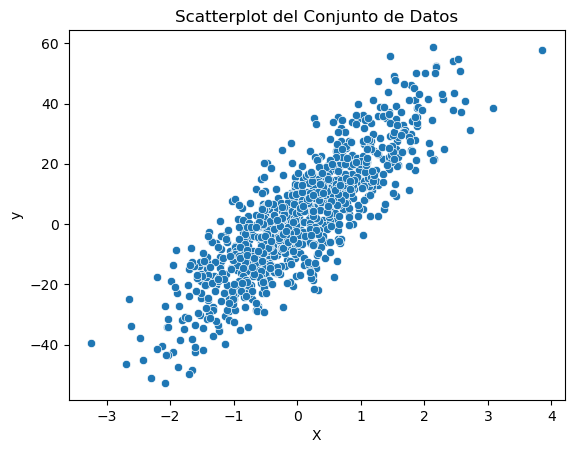

In [5]:
ax = plt.subplot()

sns.scatterplot(x = X.flatten(), y = y, ax = ax)

ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_title('Scatterplot del Conjunto de Datos')

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9999)

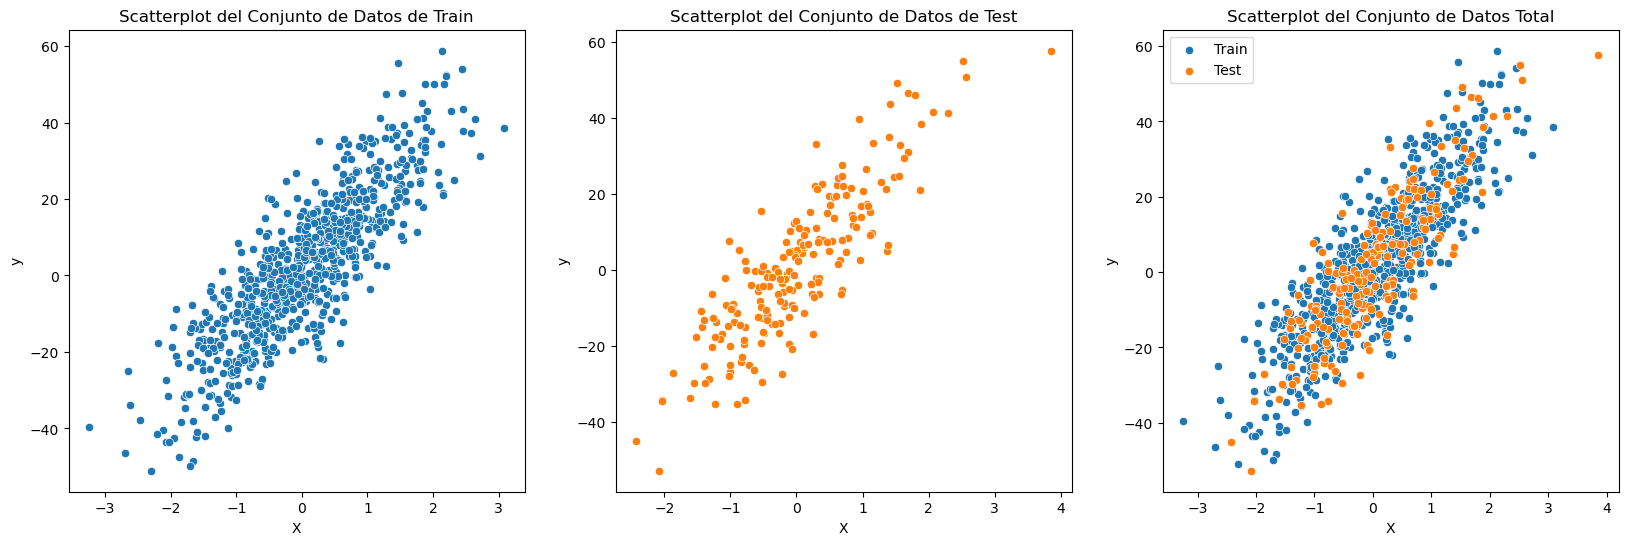

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))
ax1, ax2, ax3 = ax.flatten()

# Axis 1: Train
sns.scatterplot(x = X_train.flatten(), y = y_train, ax = ax1)

ax1.set_xlabel('X')
ax1.set_ylabel('y')

ax1.set_title('Scatterplot del Conjunto de Datos de Train')

# Axis 2: Test
sns.scatterplot(x = X_test.flatten(), y = y_test, ax = ax2, color = sns.color_palette()[1])

ax2.set_xlabel('X')
ax2.set_ylabel('y')

ax2.set_title('Scatterplot del Conjunto de Datos de Test')

# Axis 3: Todos
sns.scatterplot(x = X_train.flatten(), y = y_train, ax = ax3, color = sns.color_palette()[0], label = 'Train')
sns.scatterplot(x = X_test.flatten(), y = y_test, ax = ax3, color = sns.color_palette()[1], label = 'Test')

ax3.set_xlabel('X')
ax3.set_ylabel('y')

ax3.legend()

ax3.set_title('Scatterplot del Conjunto de Datos Total')

plt.show()

##### Es posible modificar los datos que se envían a cada conjunto al modificar la semilla (```random_state```)

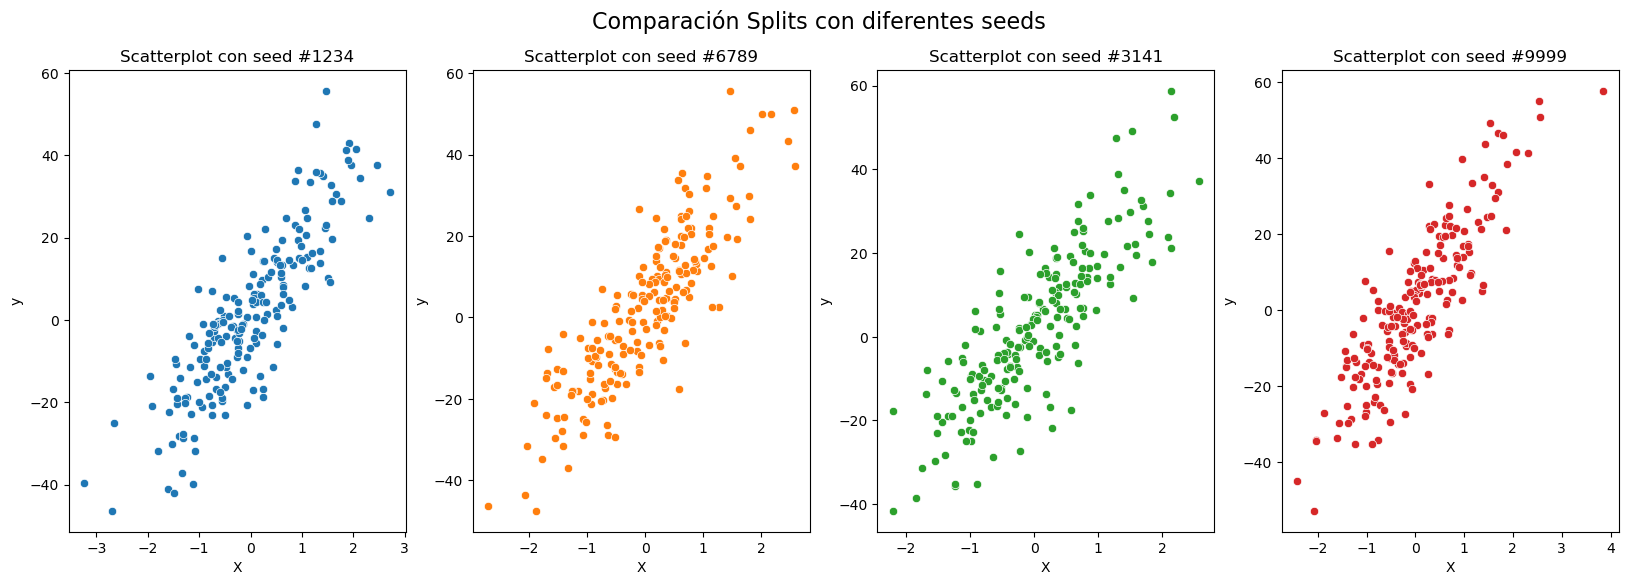

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 6))
#ax1, ax2, ax3, ax4 = ax.flatten()

for i, seed in enumerate([1234, 6789, 3141, 9999]):
    
    _, X_test, _, y_test = train_test_split(X, y, test_size= 0.2, random_state=seed)
    
    sns.scatterplot(x = X_test.flatten(), y = y_test, ax = ax[i], color = sns.color_palette()[i])
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('y')
    ax[i].set_title(f'Scatterplot con seed #{seed}')

fig.suptitle('Comparación Splits con diferentes seeds', size = 16)
plt.show()

***
##### Ahora, probemos entrenar un modelo lineal (**Regresión Lineal**) con nuestros datos.

***Aclaración**: en este módulo no se profundiza en el entrenamiento de modelos, ni en sus clases, métodos ni atributos.*

In [9]:
# Generar el dataset sinético
X, y = make_regression(n_samples=1000, n_features=1, noise=10, bias = 1.5, random_state=42)

# Split entre datos de Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9999)

print('>> Datos en X: {}\n>> Datos en X_train: {}\n>> Datos en X_test: {}'.format(X.shape[0], X_train.shape[0], X_test.shape[0]))

>> Datos en X: 1000
>> Datos en X_train: 800
>> Datos en X_test: 200


In [10]:
# Inicializar la instancia de LinearRegression
lr = LinearRegression()

# Realizar el entrenamiento del modelo
lr.fit(X_train, y_train)

LinearRegression()

##### Es posible obtener los parámetros del modelo entrenado

Sea $y = m*x + b$ el modelo de regresión lineal entrenado, ```lr.coef_``` representa el valor de **$m$** y ```lr.intercept_``` el de **$b$**.

In [11]:
print('El valor de "m" es igual a {0} y el de "b" a {1}.\nEntonces, y = {0} X + {1}.'.format(lr.coef_.item(), lr.intercept_))

El valor de "m" es igual a 16.38643606094981 y el de "b" a 1.6811053189378895.
Entonces, y = 16.38643606094981 X + 1.6811053189378895.


In [55]:
# Predicciones usando el método de la clase LinearRegression
y_pred = lr.predict(X_test)



In [13]:
# Predicciones usando los parámetros obtenidos (a modo de comparación)
y_pred_formula = (X_test * lr.coef_ + lr.intercept_).reshape(X_test.shape[0], )

In [14]:
print('Son ambas predicciones iguales? {}'.format("Sí" if np.array_equal(y_pred, y_pred_formula) else "No"))

Son ambas predicciones iguales? Sí


***
#### Performance del modelo entrenado

Para determinar el correcto funcionamiento del modelo se recurre al uso de ciertas métricas (en este caso, métricas específicas para problemas de regresión):

* **Coeficiente de Determinación (R2)**:

    * **Explicación:** El coeficiente de determinación, conocido como R-cuadrado (R2), mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en un modelo de regresión. R2 es una medida de cuán bien se ajusta el modelo a los datos. Un valor cercano a 1 indica un buen ajuste, mientras que un valor cercano a 0 indica que el modelo no explica bien la variabilidad de los datos.
    
    * **Fórmula:**
        $ R^2 = 1 - \frac{SSR}{SST}$ <br>
        Donde 
        * SSR es la suma de los cuadrados de las residuales (errores del modelo) y 
        * SST es la suma total de los cuadrados (varianza total de los datos).

* **Error Absoluto Medio (MAE):**

    * **Explicación:** El Error Absoluto Medio (MAE) mide el promedio de las diferencias absolutas entre las predicciones y los valores reales. Es una métrica que cuantifica la magnitud promedio de los errores en el modelo de regresión.
    
    * **Fórmula:**
        $ \textit{MAE} = \frac{1}{n} \sum_{i = 1}^{n} \left | y_{i} - {\hat{y}}_{i} \right |$ <br>
        Donde $y_{i}$ e ${\hat{y}}_{i}$ son el valor real y predicho, respectivamente.
        
        
* **Error Cuadrático Medio (RMSE):**

    * **Explicación:** El Error Cuadrático Medio (RMSE) es similar al MAE, pero penaliza más los errores grandes, ya que involucra el cuadrado de las diferencias entre las predicciones y los valores reales. Es una medida de la precisión del modelo que tiene en cuenta la dispersión de los errores.
    
    * **Fórmula:**
        $ \textit{RMSE} = \sqrt(\frac{1}{n} \sum_{i = 1}^{n} (y_{i} - {\hat{y}}_{i})^{2})$
        
        
* **Error Porcentual Absoluto Medio (MAPE):**

    * **Explicación:** El Error Porcentual Absoluto Medio (MAPE o MRE) mide el promedio de los errores porcentuales absolutos entre las predicciones y los valores reales. Es útil cuando se necesita una métrica que exprese el error como un porcentaje relativo al valor real.
    
    * **Fórmula:**
        $ \textit{MAPE} = \frac{1}{n} \sum_{i = 1}^{n} \left | \frac{y_{i} - {\hat{y}}_{i}}{y_{i}} \right |$
        
* *Aclaración*: estas métricas dependen del dominio de la variable a predecir.

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [16]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [18]:
metric_name = []
train_metrics = []
test_metrics = []

for metric in [r2_score, mae, rmse, mape]:
    metric_name.append(metric.__name__)
    train_metrics.append(metric(y_train, y_train_pred)) 
    test_metrics.append(metric(y_test, y_test_pred))
    
metrics = pd.DataFrame(data = {'Train Metrics': train_metrics, 'Test Metrics': test_metrics}, index = metric_name)

In [19]:
metrics

,Train Metrics,Test Metrics
r2_score,0.725603,0.744572
mean_absolute_error,7.880192,7.946812
rmse,9.885751,9.977797
mean_absolute_percentage_error,2.644172,2.051394


***
##### Es posible, además, ver la representación gráfica del modelo

In [20]:
dominio = np.linspace(X.min(), X.max(), 1000)

In [21]:
y_model = lr.predict(dominio.reshape(1000, 1))

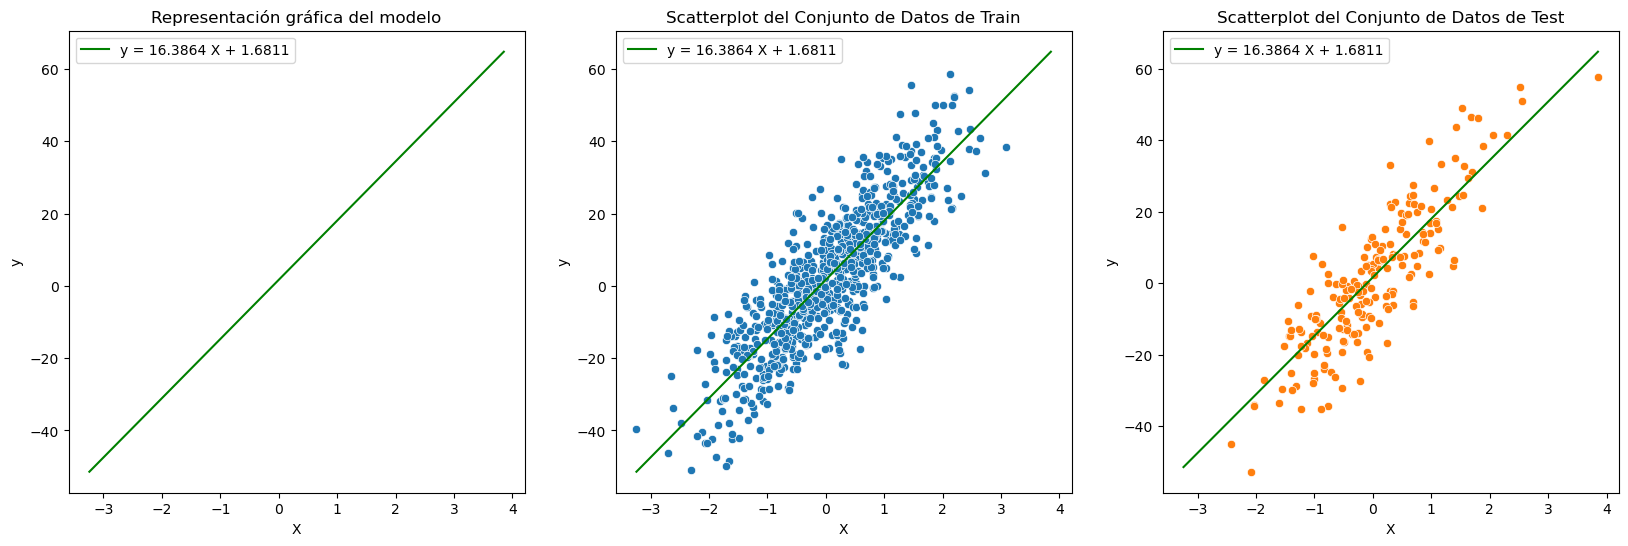

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))
ax1, ax2, ax3 = ax.flatten()

sns.lineplot(x = dominio, y = y_model, ax = ax1, color = 'green', label = 'y = {:.4f} X + {:.4f}'.format(lr.coef_.item(), lr.intercept_))

ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Representación gráfica del modelo')

# Axis 2: Train
sns.scatterplot(x = X_train.flatten(), y = y_train, ax = ax2, color = sns.color_palette()[0])
sns.lineplot(x = dominio, y = y_model, ax = ax2, color = 'green', label = 'y = {:.4f} X + {:.4f}'.format(lr.coef_.item(), lr.intercept_))

ax2.set_xlabel('X')
ax2.set_ylabel('y')

ax2.set_title('Scatterplot del Conjunto de Datos de Train')

# Axis 3: Test
sns.scatterplot(x = X_test.flatten(), y = y_test, ax = ax3, color = sns.color_palette()[1])
sns.lineplot(x = dominio, y = y_model, ax = ax3, color = 'green', label = 'y = {:.4f} X + {:.4f}'.format(lr.coef_.item(), lr.intercept_))

ax3.set_xlabel('X')
ax3.set_ylabel('y')

ax3.set_title('Scatterplot del Conjunto de Datos de Test')

plt.show()

***
## Cross Validation

La ***Cross Validation*** (o Validación Cruzada) es una técnica fundamental en el campo de la Ciencia de Datos y el Aprendizaje Automático que se utiliza para evaluar y validar la capacidad predictiva de un modelo de manera rigurosa y confiable. Su propósito principal radica en estimar el rendimiento del modelo en datos no vistos previamente, lo que permite una evaluación más precisa de su capacidad de generalización.

La técnica implica la división del conjunto de datos en múltiples particiones llamadas *folds*. En un proceso iterativo, se entrena y evalúa el modelo utilizando diferentes combinaciones de estos *folds*, asegurándose de que cada pliegue se utilice tanto para el entrenamiento como para la evaluación en momentos diferentes. Esto resulta en múltiples medidas de rendimiento que se promedian para obtener una evaluación global del modelo.

La *Cross Validation* aborda problemas como el *overfitting* y la varianza en la estimación del rendimiento del modelo, al proporcionar una evaluación más robusta y realista. Entre las variantes más comunes de la Validación Cruzada se encuentran:

1. **K-fold Cross-Validation:**
Divide el conjunto de datos en K pliegues (folds) y realiza K iteraciones de entrenamiento y evaluación, utilizando un pliegue diferente como conjunto de prueba en cada iteración. Luego, se promedian los resultados de rendimiento para obtener una estimación general del rendimiento del modelo.

1. **Hold-Out Cross-Validation:**
Divide el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. El modelo se entrena en el conjunto de entrenamiento y se evalúa en el conjunto de prueba. Es una técnica simple pero menos robusta que K-fold cross-validation. En algunos casos, es posible utilizar **3 conjuntos**: *Training*, *Validation* y *Test*; este caso particular, podría ser englobado dentro del *K-fold* cuando *k* = 1.

1. **Stratified K-fold Cross-Validation:**
Similar a K-fold cross-validation, pero garantiza que la proporción de clases en cada pliegue sea similar a la proporción en el conjunto de datos original. Es útil cuando se trabaja con conjuntos de datos desequilibrados.

1. **Leave-P-Out Cross-Validation:**
Deja P puntos de datos fuera del conjunto de entrenamiento en cada iteración y utiliza esos puntos para evaluar el modelo. Esto se repite para todas las combinaciones posibles de P puntos de datos, lo que puede ser costoso computacionalmente.

1. **Leave-One-Out Cross-Validation:**
Un caso especial de Leave-P-Out Cross-Validation donde P es igual a 1. En cada iteración, se deja un solo punto de datos fuera del conjunto de entrenamiento y se evalúa el modelo en ese punto.

1. **MonteCarlo (Shuffle-Split) Cross-Validation:**
Divide el conjunto de datos en subconjuntos de entrenamiento y prueba de manera aleatoria en cada iteración. Esto puede ser útil para conjuntos de datos grandes y cuando se desea una validación cruzada aleatoria.

1. **Time Series (Rolling Cross-Validation):**
Diseñado para conjuntos de datos de series temporales o conjuntos de datos donde **el orden de los datos es importante**. Divide el conjunto de datos en segmentos secuenciales de entrenamiento y prueba para simular la predicción en el tiempo real.

***
### K-fold Cross-Validation

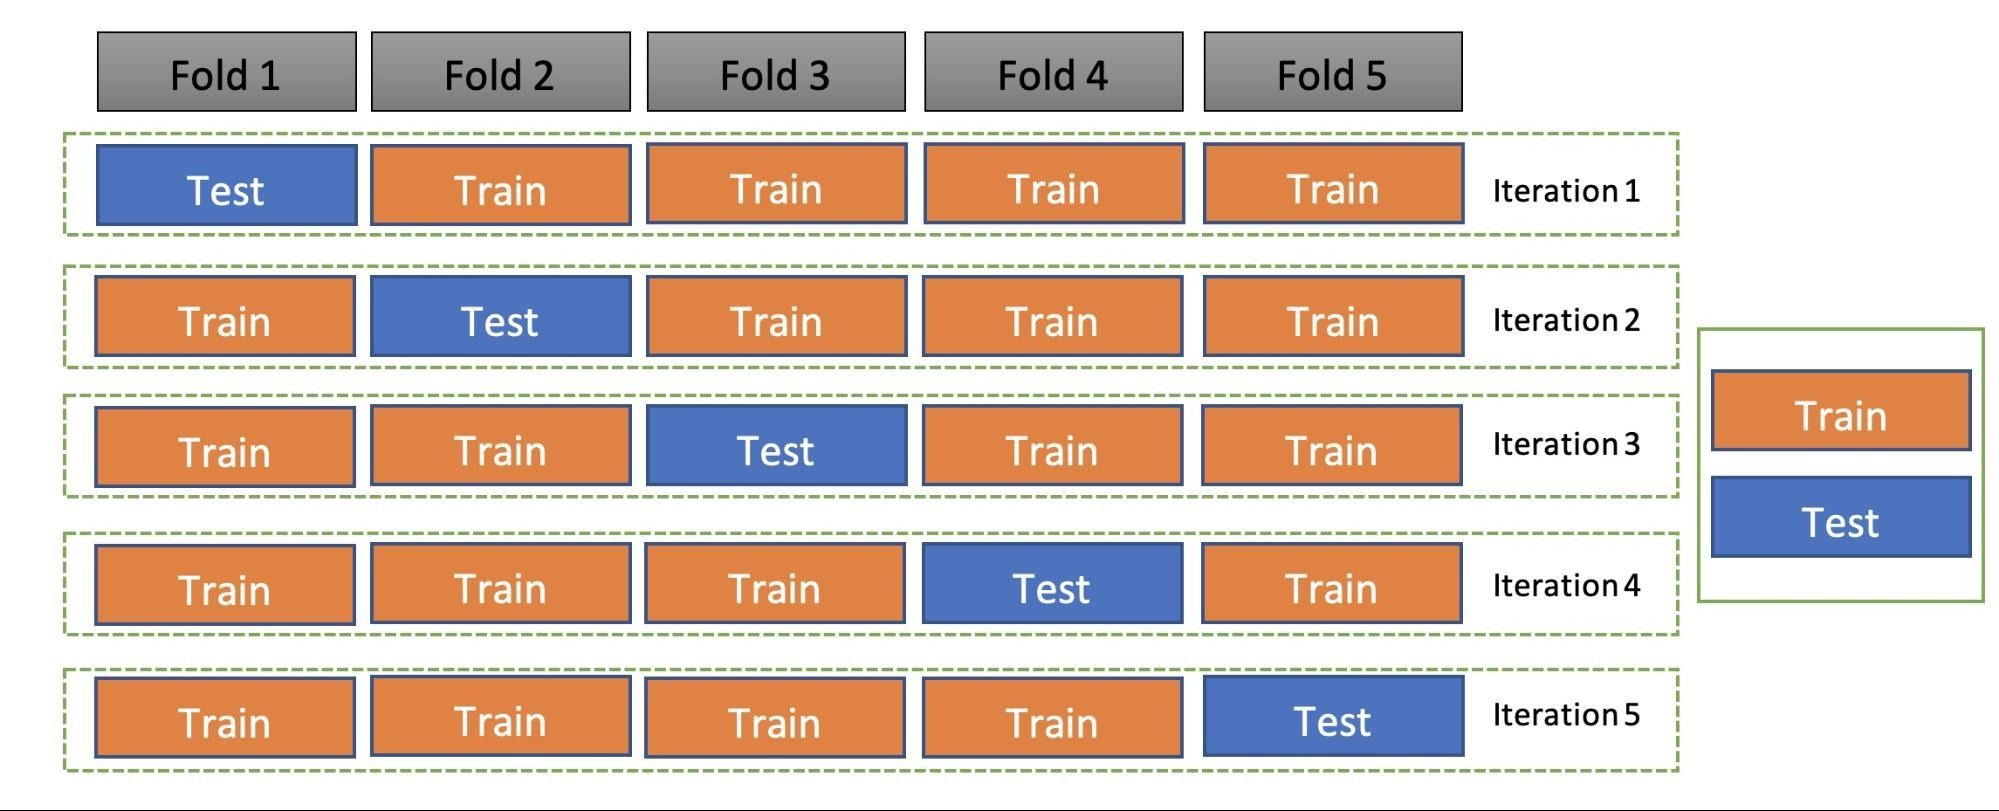

In [23]:
from sklearn.model_selection import KFold
import matplotlib.gridspec as gridspec

In [24]:
# Generar el dataset sinético
X, y = make_regression(n_samples=1000, n_features=1, noise=10, bias = 1.5, random_state=42)

In [25]:
kf = KFold(n_splits=5)

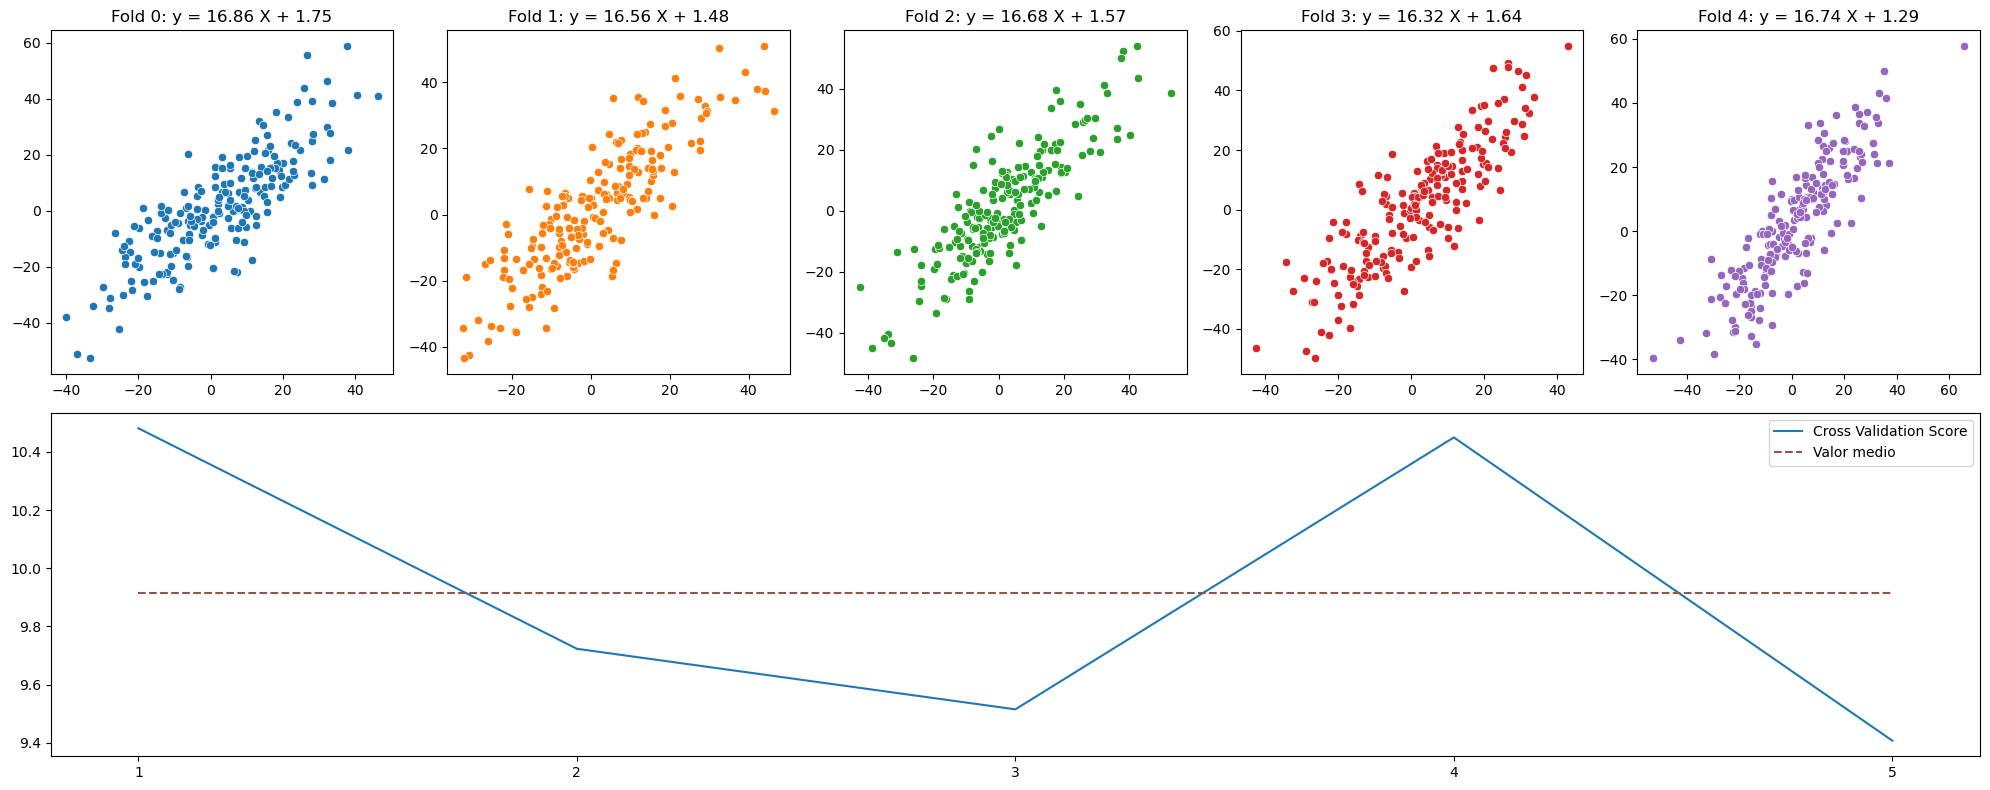

In [26]:
# Lista para guaradr los valores de cv intermedios
cv_results = []

# Crear figura y gridspec layout
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 1])

for i, (train_index, test_index) in enumerate(kf.split(X)):

    # Itera la posición del subplot
    ax = plt.subplot(gs[0, i])

    # Instanciar y fitear el modelo
    lr = LinearRegression()
    lr.fit(X[train_index], y[train_index])
    
    # Realizar las predicciones y guardar los resultados
    y_pred = lr.predict(X[test_index])
    cv_results.append(rmse(y[test_index], y_pred))
    
    sns.scatterplot(x = y_pred, y = y[test_index], ax = ax, color = sns.color_palette()[i])
    
    ax.set_title('Fold {}: y = {:.2f} X + {:.2f}'.format(i, lr.coef_.item(), lr.intercept_))

# Plot de la segunda fila
ax = plt.subplot(gs[1, :])
sns.lineplot(x = range(1, kf.n_splits + 1), y = cv_results, ax = ax, label = 'Cross Validation Score')
ax.hlines(y = np.mean(cv_results), xmin = 1, xmax = kf.n_splits, color = sns.color_palette()[i + 1], linestyle = 'dashed', label = 'Valor medio')

ax.set_xticks(range(1, kf.n_splits + 1))
ax.legend()
# Adjust spacing
plt.tight_layout()

# Show the plots
plt.show()

***
### Hold-Out Cross-Validation

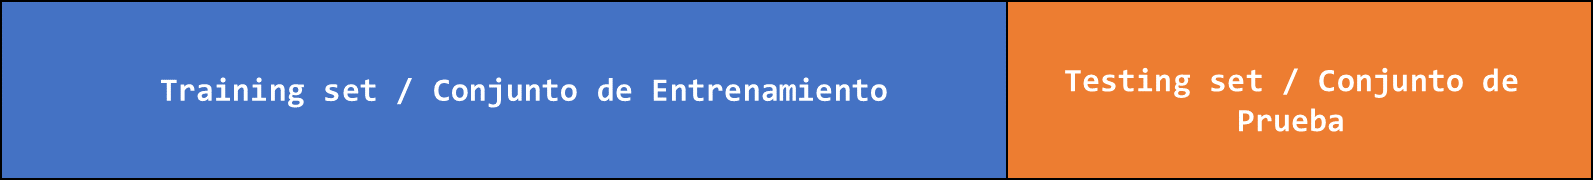

In [27]:
# Generar el dataset sinético
X, y = make_regression(n_samples=1000, n_features=1, noise=10, bias = 1.5, random_state=42)

# Split entre datos de Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9999)

In [28]:
# Inicializar la instancia de LinearRegression
lr = LinearRegression()

# Realizar el entrenamiento del modelo
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicciones usando el método de la clase LinearRegression
y_pred = lr.predict(X_test)

In [30]:
# Se evalúa la performance del modelo
rmse(y_test, y_pred)

np.float64(9.977797296175943)

***
### Stratified K-fold Cross-Validation

* No aplica en este curso. (**TBD**)

### Leave-P-Out Cross-Validation (o Leave-One-Out CV, es decir, *P = 1*)

Esta clase de CV se usa solamente en caso donde la cantidad de datos es extremadamente escasa y la performance del modelo debe ser alta. Es computacionalmente más costoso.

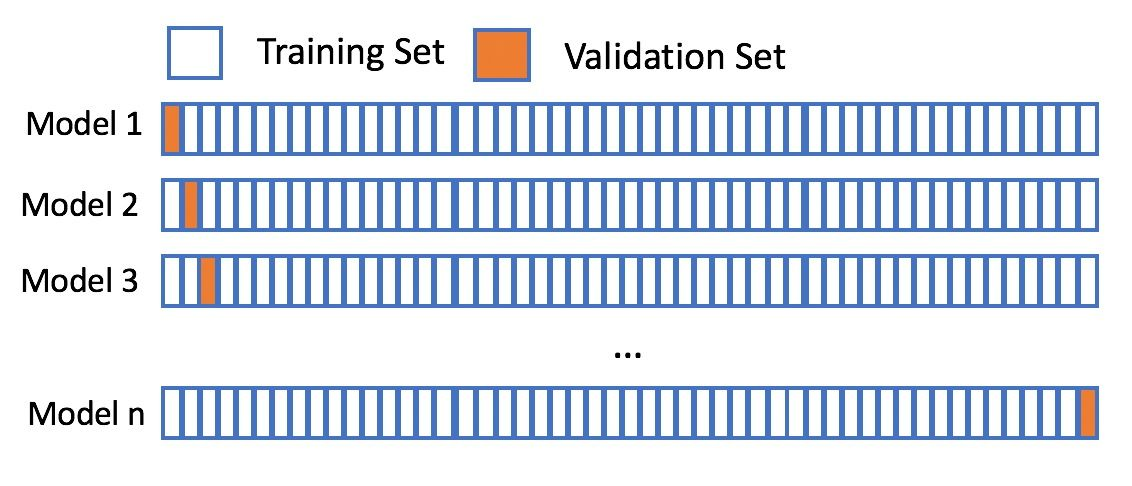

In [31]:
from sklearn.model_selection import LeavePOut

In [32]:
# Generar el dataset sinético
X, y = make_regression(n_samples=50, n_features=1, noise=10, bias = 1.5, random_state=42)

In [33]:
p = int(X.shape[0] * 0.10)

In [34]:
lpo = LeavePOut(p)

print('Cantidad de modelos que se deberían entrenar', lpo.get_n_splits(X))

Cantidad de modelos que se deberían entrenar 2118760


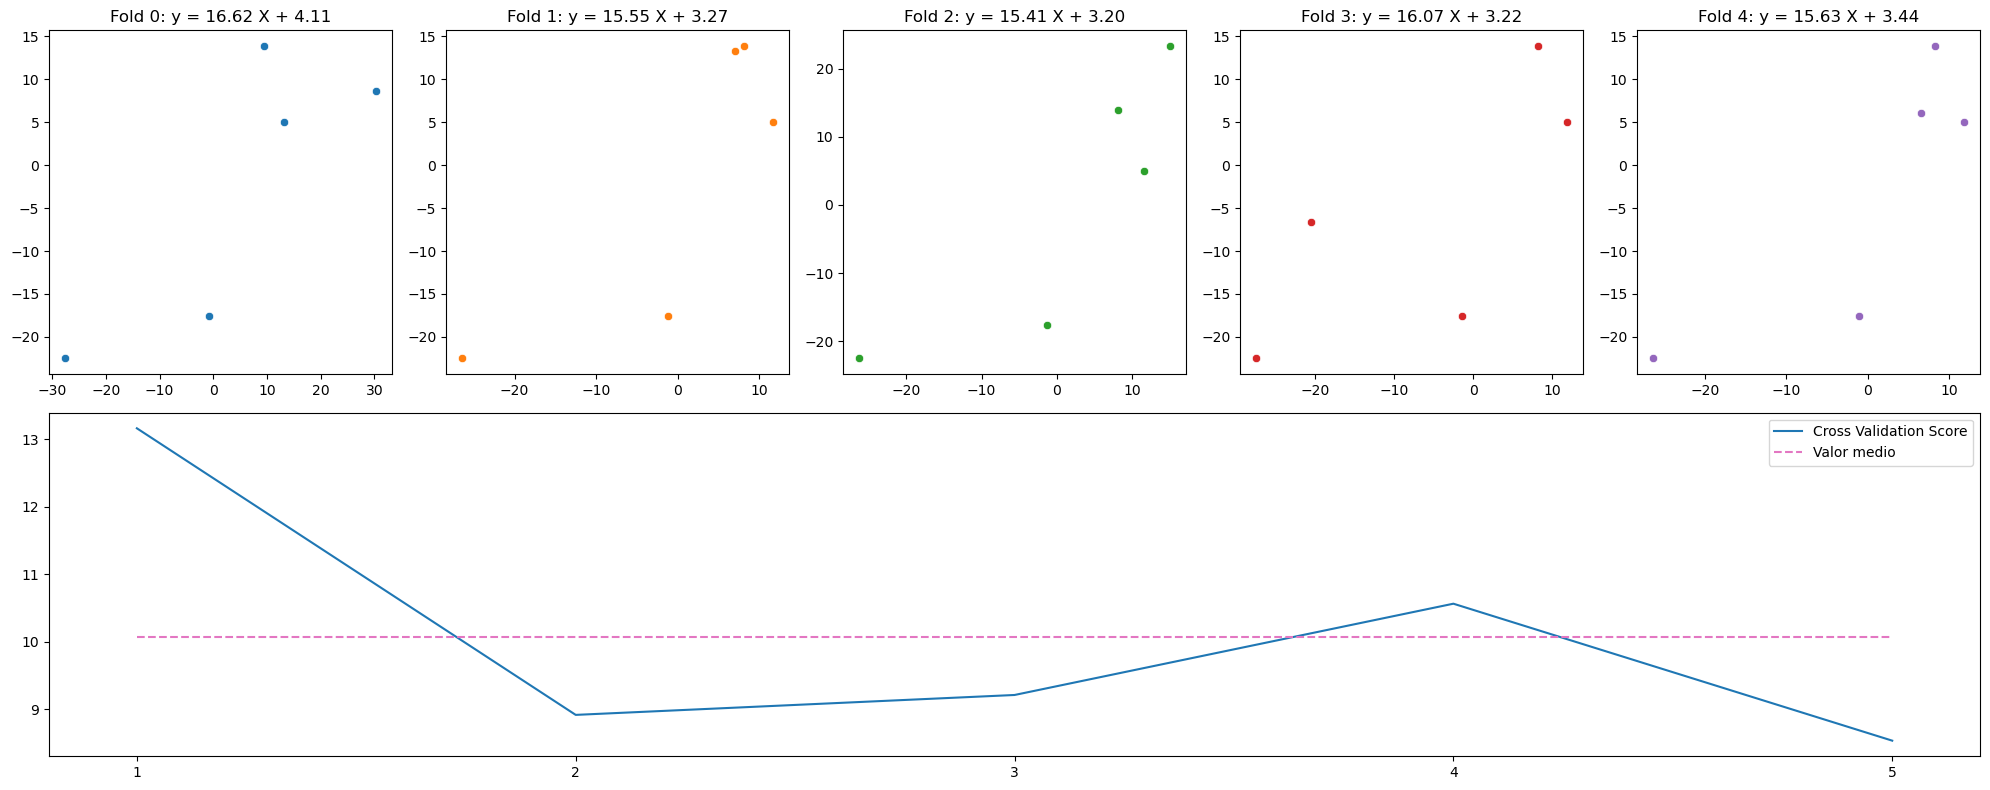

In [35]:
# Lista para guaradr los valores de cv intermedios
cv_results = []

# Crear figura y gridspec layout
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 1])

for i, (train_index, test_index) in enumerate(lpo.split(X)):
    
    if i >= 5:
        break
        
    # Itera la posición del subplot
    ax = plt.subplot(gs[0, i])

    # Instanciar y fitear el modelo
    lr = LinearRegression()
    lr.fit(X[train_index], y[train_index])
    
    # Realizar las predicciones y guardar los resultados
    y_pred = lr.predict(X[test_index])
    cv_results.append(rmse(y[test_index], y_pred))
    
    sns.scatterplot(x = y_pred, y = y[test_index], ax = ax, color = sns.color_palette()[i])
    
    ax.set_title('Fold {}: y = {:.2f} X + {:.2f}'.format(i, lr.coef_.item(), lr.intercept_))
    
        
# Plot de la segunda fila
ax = plt.subplot(gs[1, :])
sns.lineplot(x = range(1, i + 1), y = cv_results, ax = ax, label = 'Cross Validation Score')
ax.hlines(y = np.mean(cv_results), xmin = 1, xmax = kf.n_splits, color = sns.color_palette()[i + 1], linestyle = 'dashed', label = 'Valor medio')

ax.set_xticks(range(1, i + 1))
ax.legend()
# Adjust spacing
plt.tight_layout()

# Show the plots
plt.show()

***
### MonteCarlo (Shuffle-Split) Cross-Validation
* Queda por fuera de este curso.

***
### Time Series (Rolling Cross-Validation)

In [36]:
# Datos entre 't' y 't+h' 
X_1, y_1 = np.array(simulate_regression_data(m = 6.5, b = 2, rng = rng, size = 1000))

# Datos entre 't+h' y 't+n' (con 'n' > 'h')
X_2, y_2 = np.array(simulate_regression_data(m = 4.5, b = 2, rng = rng, size = 250))

In [37]:
X = np.concatenate([X_1, X_2])
y = np.concatenate([y_1, y_2])

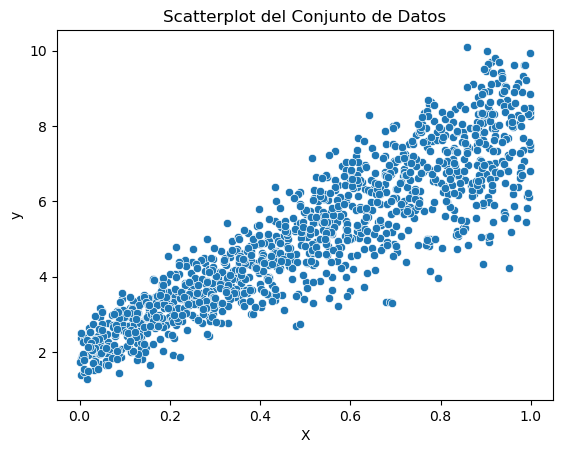

In [38]:
ax = plt.subplot()

sns.scatterplot(x = X.flatten(), y = y, ax = ax)

ax.set_xlabel('X')
ax.set_ylabel('y')

ax.set_title('Scatterplot del Conjunto de Datos')

plt.show()

In [39]:
# Split entre datos de Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9999)

In [40]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [41]:
# Inicializar la instancia de LinearRegression
lr = LinearRegression()

# Realizar el entrenamiento del modelo
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predicciones usando el método de la clase LinearRegression
y_pred = lr.predict(X_test)

In [43]:
# Se evalúa la performance del modelo
print('RMSE:', rmse(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 0.8501555159928067
R2: 0.8102968572978584


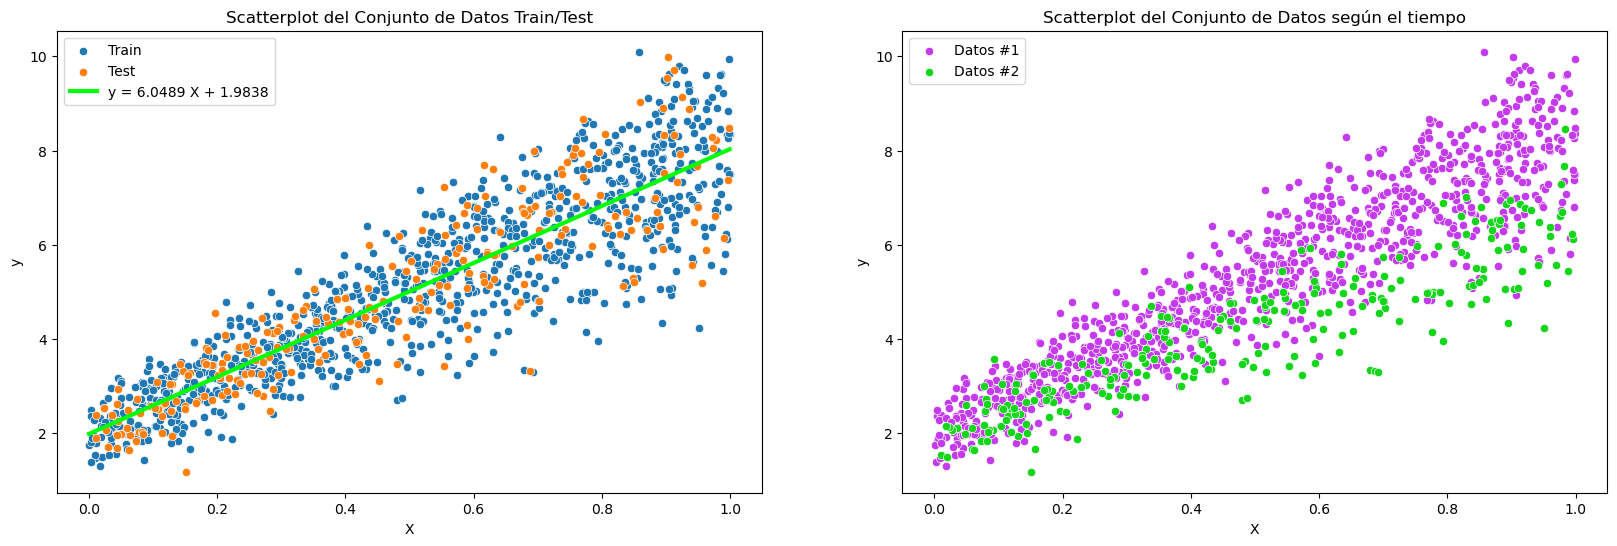

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
ax1, ax2 = ax.flatten()

# Plot 1
sns.scatterplot(x = X_train.flatten(), y = y_train, ax = ax1, color = sns.color_palette()[0], label = 'Train')
sns.scatterplot(x = X_test.flatten(), y = y_test, ax = ax1, color = sns.color_palette()[1], label = 'Test')

dominio = np.linspace(X.min(), X.max(), 1000)
y_model = lr.predict(dominio.reshape(1000, 1))
sns.lineplot(x = dominio, y = y_model, ax = ax1, color = 'lime', linewidth = 3, label = 'y = {:.4f} X + {:.4f}'.format(lr.coef_.item(), lr.intercept_))

ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Scatterplot del Conjunto de Datos Train/Test')

# Plot 2
sns.scatterplot(x = X_1.flatten(), y = y_1, ax = ax2, color = '#c43bed', label = 'Datos #1')
sns.scatterplot(x = X_2.flatten(), y = y_2, ax = ax2, color = '#13d61a', label = 'Datos #2')

ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()
ax2.set_title('Scatterplot del Conjunto de Datos según el tiempo')

plt.show()

* El problema es que no se respeta la temporalidad de los datos: se está usando datos del **futuro** para entrenar y predecir el **pasado**.
* Se utilizará ahora el conjunto de **datos 1** como **conjunto de entrenamiento** y el **2** como **conjunto de testeo**.

In [45]:
X_train = X_1.reshape(-1, 1)
X_test = X_2.reshape(-1, 1)

y_train = y_1.copy()
y_test = y_2.copy()

In [46]:
# Inicializar la instancia de LinearRegression
lr = LinearRegression()

# Realizar el entrenamiento del modelo
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predicciones usando el método de la clase LinearRegression
y_pred = lr.predict(X_test)

In [48]:
# Se evalúa la performance del modelo
print('RMSE:', rmse(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 1.3436390824130688
R2: 0.12203139296223253


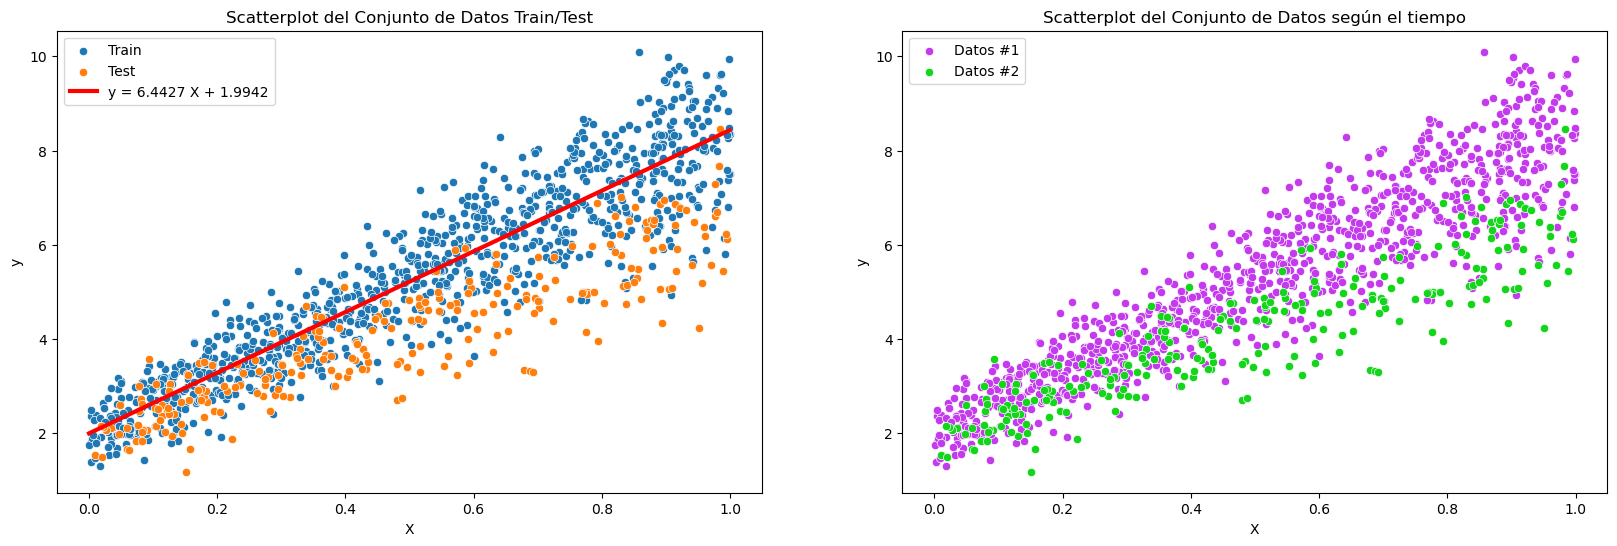

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
ax1, ax2 = ax.flatten()

# Plot 1
sns.scatterplot(x = X_train.flatten(), y = y_train, ax = ax1, color = sns.color_palette()[0], label = 'Train')
sns.scatterplot(x = X_test.flatten(), y = y_test, ax = ax1, color = sns.color_palette()[1], label = 'Test')

dominio = np.linspace(X.min(), X.max(), 1000)
y_model = lr.predict(dominio.reshape(1000, 1))
sns.lineplot(x = dominio, y = y_model, ax = ax1, color = 'red', linewidth = 3, label = 'y = {:.4f} X + {:.4f}'.format(lr.coef_.item(), lr.intercept_))

ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Scatterplot del Conjunto de Datos Train/Test')

# Plot 2
sns.scatterplot(x = X_1.flatten(), y = y_1, ax = ax2, color = '#c43bed', label = 'Datos #1')
sns.scatterplot(x = X_2.flatten(), y = y_2, ax = ax2, color = '#13d61a', label = 'Datos #2')

ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()
ax2.set_title('Scatterplot del Conjunto de Datos según el tiempo')

plt.show()

In [50]:
from sklearn.model_selection import TimeSeriesSplit

In [51]:
# Datos entre 't' y 't+h' 
X_1, y_1 = np.array(simulate_regression_data(m = 6.5, b = 2, rng = rng, size = 1000))

# Datos entre 't+h' y 't+n' (con 'n' > 'h')
X_2, y_2 = np.array(simulate_regression_data(m = 4.5, b = 2, rng = rng, size = 250))

In [52]:
X = np.concatenate([X_1, X_2])
y = np.concatenate([y_1, y_2])

In [53]:
tscv = TimeSeriesSplit(n_splits=10)

cv_rmse = []
cv_r2 = []

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index.max()}")
    print(f"  Test:  index={test_index.max()}")
    
    # Inicializar la instancia de LinearRegression
    lr = LinearRegression()

    # Realizar el entrenamiento del modelo
    lr.fit(X[train_index].reshape(-1, 1), y[train_index])
    
    y_pred = lr.predict(X[test_index].reshape(-1, 1))
    
    # Se evalúa la performance del modelo
    cv_rmse.append(rmse(y[test_index], y_pred))
    cv_r2.append(r2_score(y[test_index], y_pred))

Fold 0:
  Train: index=119
  Test:  index=232
Fold 1:
  Train: index=232
  Test:  index=345
Fold 2:
  Train: index=345
  Test:  index=458
Fold 3:
  Train: index=458
  Test:  index=571
Fold 4:
  Train: index=571
  Test:  index=684
Fold 5:
  Train: index=684
  Test:  index=797
Fold 6:
  Train: index=797
  Test:  index=910
Fold 7:
  Train: index=910
  Test:  index=1023
Fold 8:
  Train: index=1023
  Test:  index=1136
Fold 9:
  Train: index=1136
  Test:  index=1249
